In [61]:
from sklearn.metrics import confusion_matrix,classification_report
y_act=['a','a','a','b','a','b','a','b','b','a']
y_pred=['b','b','a','a','a','b','a','b','b','a']
print(confusion_matrix(y_act,y_pred,labels=['a','b']))
print(confusion_matrix(y_act,y_pred,labels=['b','a']))
print(accuracy_score(y_act,y_pred))
print(classification_report(y_act,y_pred))

[[4 2]
 [1 3]]
[[3 1]
 [2 4]]
0.7
              precision    recall  f1-score   support

           a       0.80      0.67      0.73         6
           b       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [20]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic.csv')
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [21]:
df.isna().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [22]:
df.drop(columns=['name','cabin','ticket'],inplace=True)

In [23]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,0
1305,3,female,NaN,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


In [24]:
df['age']=df['age'].fillna(df['age'].mean())

In [25]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.000000,0,0,211.3375,S,1
1,1,male,0.916700,1,2,151.5500,S,1
2,1,female,2.000000,1,2,151.5500,S,0
3,1,male,30.000000,1,2,151.5500,S,0
4,1,female,25.000000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,14.4542,C,0
1305,3,female,29.881135,1,0,14.4542,C,0
1306,3,male,26.500000,0,0,7.2250,C,0
1307,3,male,27.000000,0,0,7.2250,C,0


In [26]:
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    2
survived    0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.000000,0,0,211.3375,S,1
1,1,male,0.916700,1,2,151.5500,S,1
2,1,female,2.000000,1,2,151.5500,S,0
3,1,male,30.000000,1,2,151.5500,S,0
4,1,female,25.000000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,14.4542,C,0
1305,3,female,29.881135,1,0,14.4542,C,0
1306,3,male,26.500000,0,0,7.2250,C,0
1307,3,male,27.000000,0,0,7.2250,C,0


In [29]:
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

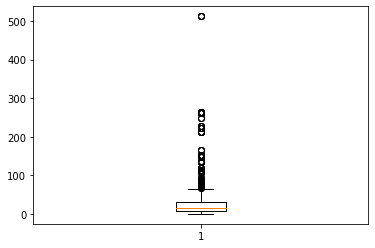

In [30]:
plt.boxplot(df['fare'])
plt.show()

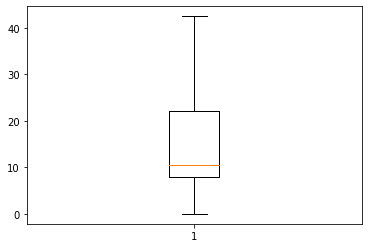

In [37]:
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
up=Q3+1.5*IQR
df=df[(df['fare'] >lb) & (df['fare']<up)]
plt.boxplot(df['fare'])
plt.show()

In [38]:
df.shape

(1052, 8)

In [43]:
df=pd.get_dummies(df)

In [44]:
df

,pclass,age,sibsp,parch,fare,survived,family,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
5,1,48.000000,0,0,26.5500,1,0,0,1,0,0,1
7,1,39.000000,0,0,0.0000,0,0,0,1,0,0,1
14,1,80.000000,0,0,30.0000,1,0,0,1,0,0,1
15,1,29.881135,0,0,25.9250,0,0,0,1,0,0,1
22,1,26.000000,0,0,30.0000,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,0,1,1,0,1,0,0
1305,3,29.881135,1,0,14.4542,0,1,1,0,1,0,0
1306,3,26.500000,0,0,7.2250,0,0,0,1,1,0,0
1307,3,27.000000,0,0,7.2250,0,0,0,1,1,0,0


In [45]:
df['family']=df['sibsp']+df['parch']
df

,pclass,age,sibsp,parch,fare,survived,family,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
5,1,48.000000,0,0,26.5500,1,0,0,1,0,0,1
7,1,39.000000,0,0,0.0000,0,0,0,1,0,0,1
14,1,80.000000,0,0,30.0000,1,0,0,1,0,0,1
15,1,29.881135,0,0,25.9250,0,0,0,1,0,0,1
22,1,26.000000,0,0,30.0000,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,0,1,1,0,1,0,0
1305,3,29.881135,1,0,14.4542,0,1,1,0,1,0,0
1306,3,26.500000,0,0,7.2250,0,0,0,1,1,0,0
1307,3,27.000000,0,0,7.2250,0,0,0,1,1,0,0


In [47]:
df.drop(columns=['sibsp','parch'],inplace=True)

In [48]:
df

,pclass,age,fare,survived,family,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
5,1,48.000000,26.5500,1,0,0,1,0,0,1
7,1,39.000000,0.0000,0,0,0,1,0,0,1
14,1,80.000000,30.0000,1,0,0,1,0,0,1
15,1,29.881135,25.9250,0,0,0,1,0,0,1
22,1,26.000000,30.0000,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,14.4542,0,1,1,0,1,0,0
1305,3,29.881135,14.4542,0,1,1,0,1,0,0
1306,3,26.500000,7.2250,0,0,0,1,1,0,0
1307,3,27.000000,7.2250,0,0,0,1,1,0,0


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
x=df[['pclass','age','fare','family','sex_female','sex_male','embarked_C','embarked_Q','embarked_S']]
y=df[['survived']]  #
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
modal=KNeighborsClassifier(n_neighbors=33)
modal.fit(x_train,y_train)
y_pred=modal.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7156398104265402


<ipython-input-53-63a082230b2e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)


In [54]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
modal=KNeighborsClassifier(n_neighbors=33)
modal.fit(x_train_scaled,y_train)
y_pred=modal.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.7772511848341233


<ipython-input-54-c08a7b24194c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train_scaled,y_train)


In [57]:
mr=[]
for i in range (1,51):
    modal=KNeighborsClassifier(n_neighbors=i)
    modal.fit(x_train,y_train)
    y_pred=modal.predict(x_test)
#     print('mse:',mean_squared_error(y_test,y_pred))
    mr+=[accuracy_score(y_test,y_pred)]
print('max',max(mr))

<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

max 0.7393364928909952


<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modal.fit(x_train,y_train)
<ipython-input-57-198ce0344fa6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [62]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


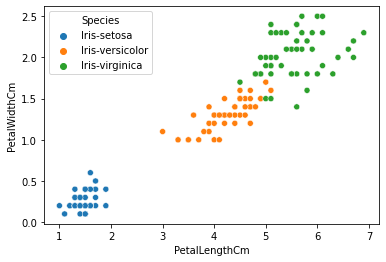

In [65]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'])
plt.show()

In [66]:
df.drop(columns=['Id'],inplace=True)

0.9333333333333333


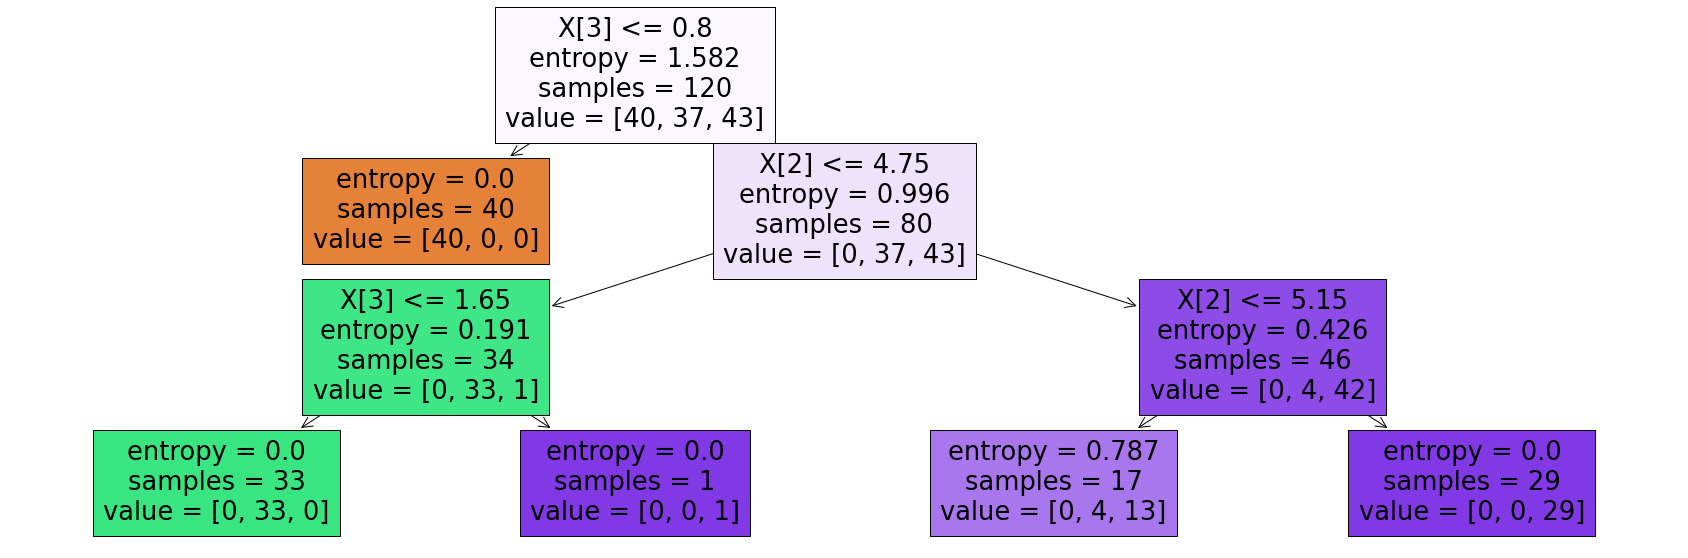

In [68]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df[['Species']]  #
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
modal=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=3)
modal.fit(x_train,y_train)
y_pred=modal.predict(x_test)
print(accuracy_score(y_test,y_pred))
plt.figure(figsize=(30,10))
plot_tree(modal,filled=True)
plt.show()

0.9666666666666667


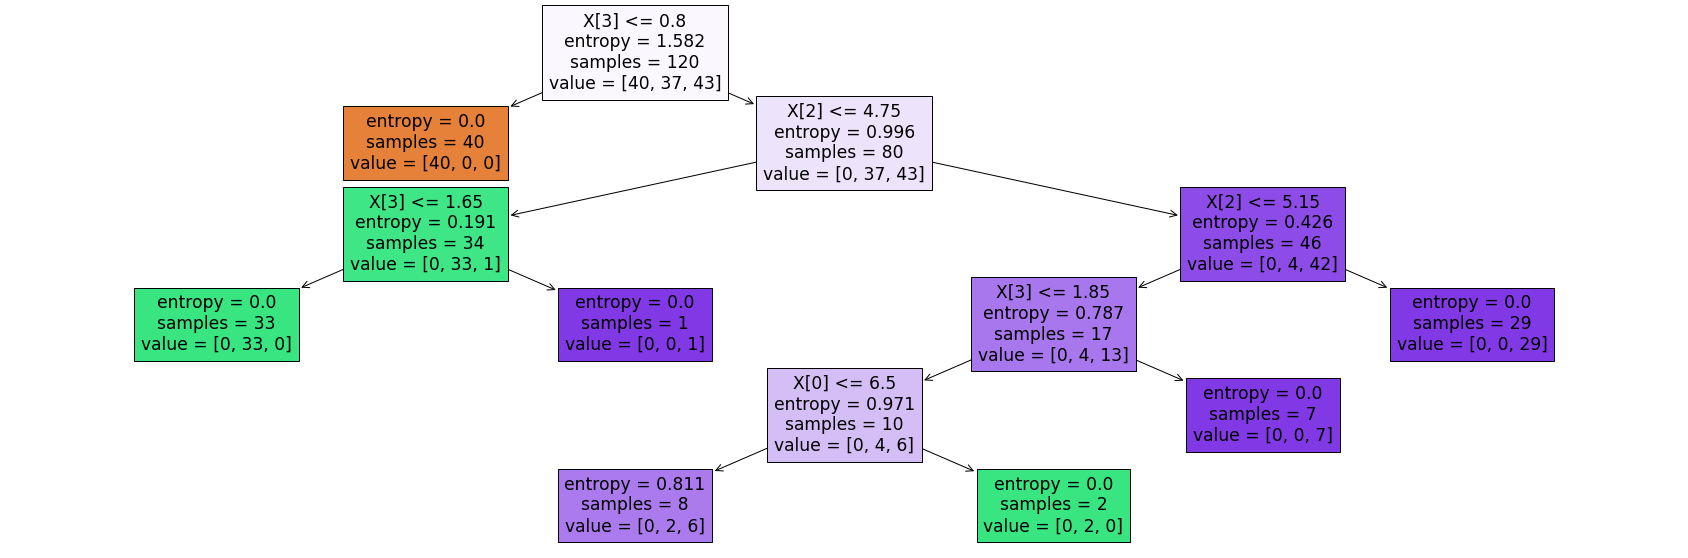

In [69]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df[['Species']]  #
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
modal=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=5) #max_depth
modal.fit(x_train,y_train)
y_pred=modal.predict(x_test)
print(accuracy_score(y_test,y_pred))
plt.figure(figsize=(30,10))
plot_tree(modal,filled=True)
plt.show()